In [21]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import pandas as pd


https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

### For all of us who ever traveled, one of the most importand factors is the cost associated with lodging. I am using AirBnB data set to see how this market looks for tourist coming to New York City. This data can also be used by homeowners who concider investiong into repurposing  their homes into vacation rentals. 
### I will be exploring factors related to price, type of rental and location. 

In [22]:
data=pd.read_csv(r"C:\Users\Maryla\Desktop\school\CIS2300 Python\notebooks jupyter\listings.csv")

In [23]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,279,2019-08-29,4.62,1,192
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.59,1,13
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0


## 1. What types of retnals are the most prevalent in different boroughs of NYC? 

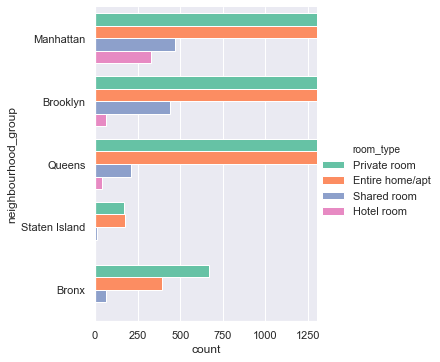

In [24]:
sns.set(style="darkgrid")
ax=sns.catplot(y="neighbourhood_group", hue="room_type", kind="count",  data=data, palette="Set2",saturation=1)

ax.set(xlim=(0, 1300))

In [25]:
### looks like Manhattan has the higest number of rental in general, with entire apartment category being the most prevalent.
### In Brooklyn, privet rooms are the most common

## 2. What is the price distribution of different types of apartments in differnt NYC boroughs:

In [26]:
apt_data=data.groupby(["room_type","neighbourhood_group"]).agg({"id":"count"})

In [27]:
apt_data.head(20)

id
room_type       neighbourhood_group       
Entire home/apt Bronx                  392
                Brooklyn              9364
                Manhattan            12828
                Queens                2135
                Staten Island          179
Hotel room      Brooklyn                66
                Manhattan              329
                Queens                  40
Private room    Bronx                  671
                Brooklyn              9985
                Manhattan             7559
                Queens                3468
                Staten Island          169
Shared room     Bronx                   63
                Brooklyn               441
                Manhattan              467
                Queens                 210
                Staten Island           11

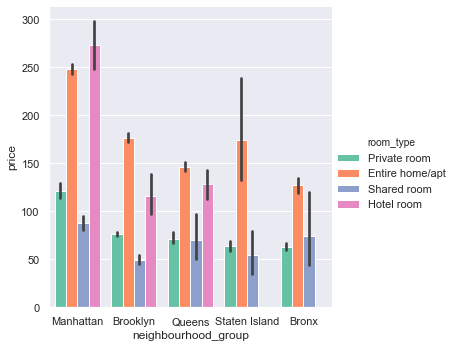

In [28]:
#prices for different type of apartment in different boroughs 
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="bar", data=data, palette="Set2",saturation=1);

#### looks like the most expensve option in manhattan is to rent hotel room and the cheapest is shared room.
#### In Bronxt however, the chepest option is a privete room.
#### Staten Island and Bronx don't have hotel rooms listed on AirBnB 
#### Staten Island has th most versatile prices for renting entire apartments.  

### 

## 3. What is the minimum rental (in days) requirements for different type of rentals?
###  first lets inspect the data

In [29]:
data["minimum_nights"].unique()


array([   3,    1,   10,   45,    2,   30,    5,    4,   90,    7,   29,
        180,   12,   31,    6,   14,    8,   15,   26,   28,  200,   20,
         11,   25,   13,   35,   21,   40,   44,    9,   65,   55,   60,
        120,  365,  122, 1125,   27,   19,   18,  240,   88,  115,  150,
        370,   80,  181,  265,  300,   17,  185,  360,  179,  320,   56,
         50,   70,  100, 1000,  250,   24,  105,  270,   22,   63,   62,
       1250,  364,  198,  500,   43,  210,   16,   23,   59,  480,   53,
         99,  160,   47,  999,  186,  366,   68,  130,   75,   85,   93,
        110,  140,  135,  170,  299,  175,   98,  456,  133,  354,   42,
         33,  400,   32,  184,  153,  134,  222,  275,  182,  114,   89,
         36,   91], dtype=int64)

#### Seems like there is a lot of long term retnals listed on AirBnB. with majrity of them being entire homes/apartments or privete rooms
#### Maybe I should zoom in more on rentals that are short term, below 3 months...

In [30]:
# I wold say that everything above 90 days (3 months) must be a long term rental 
# so for the sake of this visual let's remove it.

drop_index=data[(data["minimum_nights"]>=90)].index
data.drop(drop_index , inplace=True)
data["minimum_nights"].unique()

array([ 3,  1, 10, 45,  2, 30,  5,  4,  7, 29, 12, 31,  6, 14,  8, 15, 26,
       28, 20, 11, 25, 13, 35, 21, 40, 44,  9, 65, 55, 60, 27, 19, 18, 88,
       80, 17, 56, 50, 70, 24, 22, 63, 62, 43, 16, 23, 59, 53, 47, 68, 75,
       85, 42, 33, 32, 89, 36], dtype=int64)

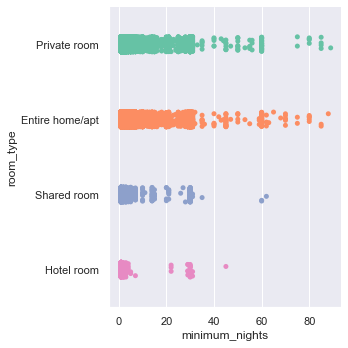

In [31]:
sns.set(style="darkgrid")
sns.catplot(x="minimum_nights", y="room_type",  data=data, palette="Set2")


#### In general it seems like shared rooms are rarely rented for longer then 30days, while privet rooms and wole apartments are potencially for longer. 
### Now,  I want to check how this distribtion vary by borough. 

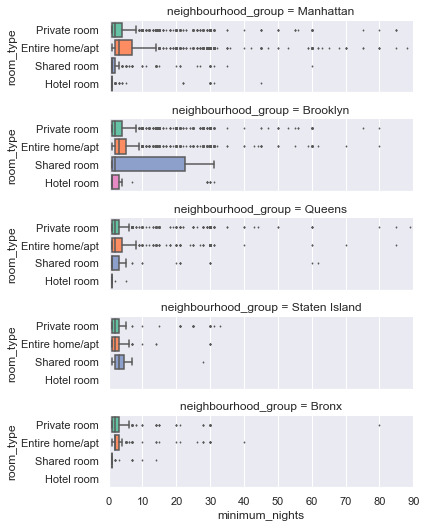

In [32]:
# here is more detailed look at the data
ax=sns.catplot(x="minimum_nights", y="room_type", row="neighbourhood_group",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data.query("minimum_nights > 0"),fliersize=1, palette="Set2",saturation=1)
ax.set(xlim=(0, 90))

### Seems like for most rentals miniumum requirement is below aprox 5 days,but in Brooklyn in shared room category there is a significant number of rentals  where minimum is above 5 days all a way up to 30 days.
### Outliers are the most prevalent in Manhattan and Brooklyn, especially in privete room and entire apartment category. 
### Hotel room almost never have night minimum, except in Brooklyn. 
